# Image Augmentation

Deep networks need large amount of training data to achieve good performance. To build a powerful image classifier using very little training data, image augmentation is usually required to boost the performance of deep networks. **Image Augmentation** artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips etc.

In [1]:
# it is solution to overcome overfitting

Basic Machine Learning workflow:
1. Examin and understand data
2. Build an input pipeline
3. Build the model
4. Train the model
5. Test the model
6. Improve the model and repeat the process

### Import packages

In [3]:
# import Tensorflow and Keras classes needed to construct our model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# ImageDataGenerator allows us to read images from given directory

import os
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [4]:
# Begin by downloading filtered version of dataset Dogs vs Cats dataset from Kaggle. Download the archive version of the dataset and store in /tmp directory

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 [==============================] - 39s 1us/step


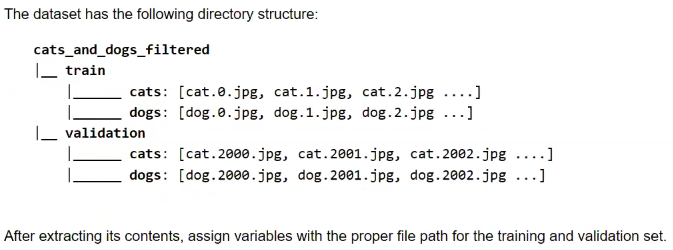

In [5]:
print(PATH)

C:\Users\hpanc\.keras\datasets\cats_and_dogs_filtered


In [6]:
train_dir = os.path.join(PATH, 'train')
validation_dir =  os.path.join(PATH, 'validation')

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats') # dir with training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # dir with training cat pictures

validation_cats_dir = os.path.join(validation_dir, 'cats') # dir with validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # dir with validation dog pictures


### Understand the data

In [10]:
# Let's look at how many dogs and cats images are in the directories

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr 
total_val = num_cats_val + num_dogs_val 


In [11]:
print('total training cat images', num_cats_tr)
print('total training dog images', num_dogs_tr)

print('total validation cat images', num_cats_val)
print('total validation dog images', num_dogs_val)
print("--")

print("Total training images: ", total_train)
print("Total validation images: ", total_val)



total training cat images 1000
total training dog images 1000
total validation cat images 500
total validation dog images 500
--
Total training images:  2000
Total validation images:  1000


In [12]:
# for convenience, set up variables to use while pre-processing the dataset and training the network
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

### Data Preparation

Format the images into appropriately pre-processes floating point tensors before feeding to the network.

1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the ImageGenerator class provided by tf.keras. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors-helpful when training the network.

In [13]:
train_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

After defining the generators for training and validation images, the *flow_from_directory* method load images from the disk, applies rescaling, and resizes the images into the required dimensions 

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')
# only 2 class:cats and dogs. hence, class_mode is binary

Found 2000 images belonging to 2 classes.


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=validation_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 1000 images belonging to 2 classes.


### Visualize training images

Visualize the training images by extracting a batch of images from the training generator - which are 128 images in this example - then plot five of them with matplotlib

In [16]:
sample_training_images, _ = next(train_data_gen)

The **next** function returns a batch from the dataset. The return value of *next* function is in the form of (x_train, y_train) where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.

In [17]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

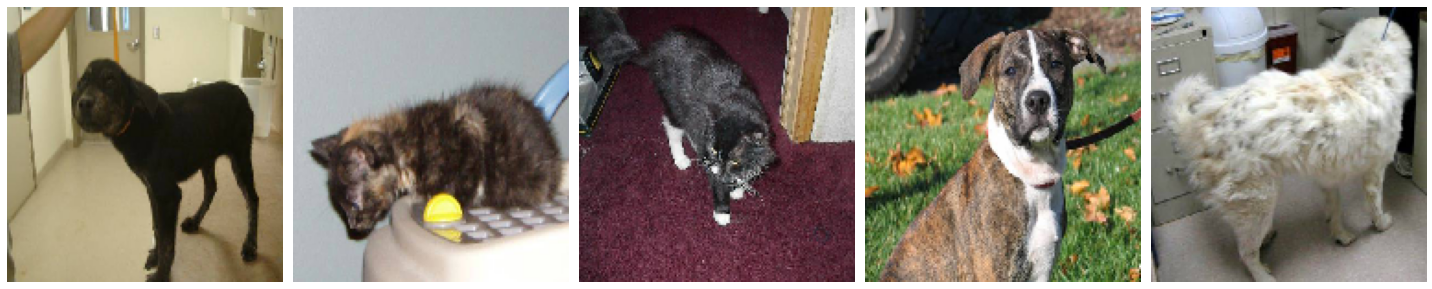

In [18]:
plotImages(sample_training_images[:5])

### Create Model

The model consists of three convolutional blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a `relu` activation function.

In [26]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

### Compile the model

Let us choose the ADAM optimizer and binary cross entropy loss function. To view training and validation accuracy for each training epoch, pass the `metrics` arguments.

In [28]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

### Model Summary

View all the layers of the network using the model's `summary` method:

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 75, 75, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 18, 18, 64)       